In [1]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()

In [2]:
def argmax_random_tiebreak(vec):
    return rng.choice(np.flatnonzero(vec == vec.max()))

In [3]:
def epsilon_greedy_selection(action_value_estimates, exploration_probability):
    if rng.random() < exploration_probability:
        return rng.integers(0, len(action_value_estimates))
    return argmax_random_tiebreak(action_value_estimates)

In [4]:
def compute_reward(action_values, selected_action):
    return rng.normal(action_values[selected_action], 1)

In [5]:
def update_estimates_using_sample_average(action_value_estimates, num_action_selections, selected_action, reward):
    estimates = action_value_estimates.copy()
    estimates[selected_action] += (reward - estimates[selected_action]) / num_action_selections[selected_action]
    return estimates

In [6]:
def run_bandit_session(num_steps, num_actions, exploration_probability):
    # Initialize
    rewards = np.zeros(num_steps)
    action_values = rng.standard_normal(num_actions)
    action_value_estimates = np.zeros(num_actions)
    num_action_selections = np.zeros(num_actions)

    # Run session
    for i in range(num_steps):
        selected_action = epsilon_greedy_selection(action_value_estimates, exploration_probability)
        num_action_selections[selected_action] += 1
        reward = compute_reward(action_values, selected_action)
        rewards[i] = reward
        action_value_estimates = update_estimates_using_sample_average(action_value_estimates, num_action_selections, selected_action, reward)
    
    return rewards

In [7]:
def run_multiple_sessions(num_sessions, num_steps, num_actions, exploration_probability):
    average_rewards = np.zeros(num_steps)
    for i in range(num_sessions):
        rewards = run_bandit_session(num_steps, num_actions, exploration_probability)
        average_rewards += rewards
    average_rewards /= num_sessions
    return average_rewards

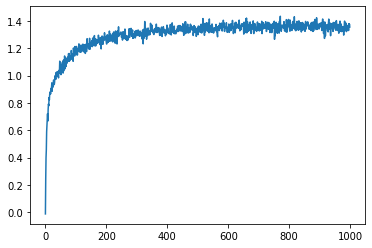

In [9]:
average_rewards = run_multiple_sessions(2000, 1000, 10, 0.1)
plt.plot(np.arange(len(average_rewards)), average_rewards)